In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()
le.fit(df['Gender'])
print(le.classes_)
gen=le.transform(df['Gender'])
print(gen)

['Female' 'Male']
[1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0
 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0
 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0
 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0
 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0
 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1
 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0
 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1
 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0
 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0]


In [14]:
df['Gender']()

TypeError: 'Series' object is not callable

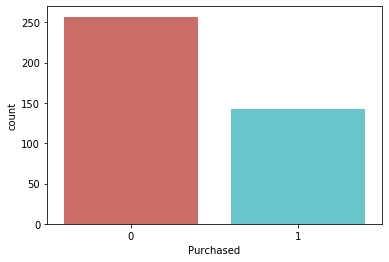

In [8]:
df.Purchased.value_counts()
sns.countplot(x='Purchased',data=df,palette='hls')
plt.show()

In [18]:
x=df.drop(['Purchased','Gender'],axis=1)
y=df['Purchased']

In [26]:
df['gen']=gen

In [28]:
x=df.drop(['Purchased','Gender'],axis=1)

In [29]:
x.head()

,User ID,Age,EstimatedSalary,gen
0,15624510,19,19000,1
1,15810944,35,20000,1
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,1


In [30]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [32]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_perd=logreg.predict(x_test)

In [36]:
met=metrics.confusion_matrix(y_test,y_perd)
met

array([[56,  2],
       [12, 10]], dtype=int64)

In [37]:
print(metrics.accuracy_score(y_test,y_perd))
print(metrics.recall_score(y_test,y_perd))
print(metrics.precision_score(y_test,y_perd))

0.825
0.45454545454545453
0.8333333333333334


In [39]:
y_pred_proba=logreg.predict_proba(x_test)

In [42]:
auc=metrics.roc_auc_score(y_test,y_perd)
auc

0.7100313479623824

In [43]:
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [44]:
dt = DecisionTreeClassifier()

In [46]:
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.9

[Text(130.66500000000002, 209.6742857142857, 'X[1] <= 42.5\ngini = 0.459\nsamples = 400\nvalue = [257, 143]'),
 Text(63.24, 194.14285714285714, 'X[2] <= 90500.0\ngini = 0.271\nsamples = 285\nvalue = [239, 46]'),
 Text(29.76, 178.61142857142858, 'X[1] <= 36.5\ngini = 0.072\nsamples = 241\nvalue = [232, 9]'),
 Text(22.32, 163.07999999999998, 'gini = 0.0\nsamples = 162\nvalue = [162, 0]'),
 Text(37.2, 163.07999999999998, 'X[2] <= 83500.0\ngini = 0.202\nsamples = 79\nvalue = [70, 9]'),
 Text(29.76, 147.54857142857142, 'X[0] <= 15575072.5\ngini = 0.165\nsamples = 77\nvalue = [70, 7]'),
 Text(22.32, 132.01714285714286, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(37.2, 132.01714285714286, 'X[2] <= 72500.0\ngini = 0.145\nsamples = 76\nvalue = [70, 6]'),
 Text(22.32, 116.48571428571428, 'X[1] <= 37.5\ngini = 0.036\nsamples = 54\nvalue = [53, 1]'),
 Text(14.88, 100.9542857142857, 'X[0] <= 15750391.0\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(7.44, 85.42285714285714, 'gini = 0.0\ns

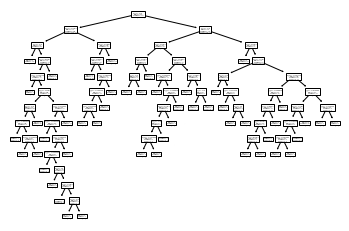

In [47]:
tree.plot_tree(dt.fit(x,y))


In [49]:
dt2 = DecisionTreeClassifier(max_depth=5)
dt2.fit(x_train,y_train)
dt2.score(x_test,y_test)

0.9375

In [51]:
dt3 = DecisionTreeClassifier(min_samples_leaf=90)
dt3.fit(x_train,y_train)
dt3.score(x_test,y_test)

0.925

In [53]:
dt4 = DecisionTreeClassifier(criterion="entropy")
dt4.fit(x_train,y_train)
dt4.score(x_test,y_test)

0.925

In [57]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=60)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.95
